## Churn Prediction 
### Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

## 1) Problem statement
- End-to-end machine learning project to analyze and predict customer churn based on customer behavior and service attributes.

## 2) Data Collection
- Dataset Source = https://www.kaggle.com/datasets/blastchar/telco-customer-churn
- The raw data contains 7043 rows (customers) and 21 columns (features).
   

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('data/churn_prediction.csv')

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.shape

(7043, 21)

## Dataset Information

- customerID: Unique customer ID
- gender: Male or Female
- SeniorCitizen: Senior citizen or not (1, 0)
- Partner: Has a partner or not (Yes, No)
- Dependents: Has dependents or not (Yes, No)
- tenure: Number of months the customer stayed
- PhoneService: Phone service available or not (Yes, No)
- MultipleLines: Multiple phone lines or not
- InternetService: Type of internet service (DSL, Fiber optic, No)
- OnlineSecurity: Online security available or not
- OnlineBackup: Online backup available or not
- DeviceProtection: Device protection available or not
- TechSupport: Tech support available or not
- StreamingTV: Streaming TV service used or not
- StreamingMovies: Streaming movies service used or not
- Contract: Contract type (Month-to-month, One year, Two year)
- PaperlessBilling: Paperless billing used or not
- PaymentMethod: Method of payment
- MonthlyCharges: Monthly charges paid by customer
- TotalCharges: Total charges paid by customer
- Churn: Customer left the service or not (Yes, No)

## Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [14]:
## Check Missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### There are no missing values in the data set

In [15]:
### Check Duplicates
df.duplicated().sum()

np.int64(0)

### There are no duplicates values in the data set

In [16]:
### check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [42]:
# Cell for Cleaning TotalCharges

# 1. Convert blank strings (spaces) to NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# 2. Convert the column to numeric (float), forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 3. Handle the small number of missing values (the rows that had ' ')
# Since there are very few (only 11 in a 7043 row dataset, as per standard dataset checks), 
# filling with the median is a safe approach.
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_total_charges)

# Verification: Check the data type again
print(df['TotalCharges'].dtype)

float64


In [17]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [18]:
### statistics of dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in 'SeniorCitizen' variable: ", end=" ")
print(df['SeniorCitizen'].unique())

print("Categories in 'Partner' variable: ", end=" ")
print(df['Partner'].unique())

print("Categories in 'Dependents' variable: ", end=" ")
print(df['Dependents'].unique())

print("Categories in 'PhoneService' variable: ", end=" ")
print(df['PhoneService'].unique())

print("Categories in 'MultipleLines' variable: ", end=" ")
print(df['MultipleLines'].unique())

print("Categories in 'InternetService' variable: ", end=" ")
print(df['InternetService'].unique())

print("Categories in 'OnlineSecurity' variable: ", end=" ")
print(df['OnlineSecurity'].unique())

print("Categories in 'DeviceProtection' variable: ", end=" ")
print(df['DeviceProtection'].unique())

print("Categories in 'TechSupport' variable: ", end=" ")
print(df['TechSupport'].unique())

print("Categories in 'StreamingTV' variable: ", end=" ")
print(df['StreamingTV'].unique())

print("Categories in 'StreamingMovies' variable: ", end=" ")
print(df['StreamingMovies'].unique())

print("Categories in 'Contract' variable: ", end=" ")
print(df['Contract'].unique())

print("Categories in 'PaperlessBilling' variable: ", end=" ")
print(df['PaperlessBilling'].unique())

print("Categories in 'PaymentMethod' variable: ", end=" ")
print(df['PaymentMethod'].unique())

print("Categories in 'Churn' variable: ", end=" ")
print(df['Churn'].unique())


Categories in 'gender' variable:  ['Female' 'Male']
Categories in 'SeniorCitizen' variable:  [0 1]
Categories in 'Partner' variable:  ['Yes' 'No']
Categories in 'Dependents' variable:  ['No' 'Yes']
Categories in 'PhoneService' variable:  ['No' 'Yes']
Categories in 'MultipleLines' variable:  ['No phone service' 'No' 'Yes']
Categories in 'InternetService' variable:  ['DSL' 'Fiber optic' 'No']
Categories in 'OnlineSecurity' variable:  ['No' 'Yes' 'No internet service']
Categories in 'DeviceProtection' variable:  ['No' 'Yes' 'No internet service']
Categories in 'TechSupport' variable:  ['No' 'Yes' 'No internet service']
Categories in 'StreamingTV' variable:  ['No' 'Yes' 'No internet service']
Categories in 'StreamingMovies' variable:  ['No' 'Yes' 'No internet service']
Categories in 'Contract' variable:  ['Month-to-month' 'One year' 'Two year']
Categories in 'PaperlessBilling' variable:  ['Yes' 'No']
Categories in 'PaymentMethod' variable:  ['Electronic check' 'Mailed check' 'Bank transfer

In [21]:
numeric_features = [col for col in df.columns if df[col].dtype != 'O']
categorical_features = [col for col in df.columns if df[col].dtype == 'O']

# Print the results
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['SeniorCitizen', 'tenure', 'MonthlyCharges']

We have 18 categorical features: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [22]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


## Exploring Data
- Histogram
- Kernel Distribution Function (KDE)

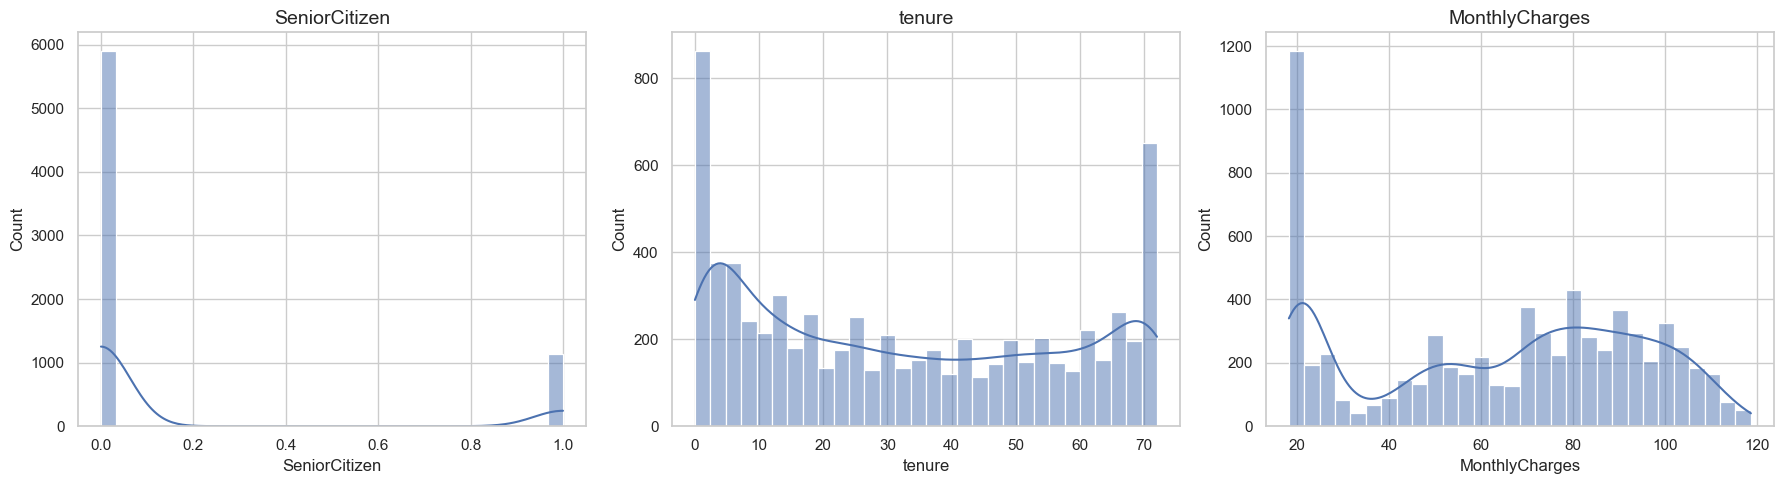

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Identify numerical features
numeric_features = [col for col in df.columns if df[col].dtype != 'O']

# Grid size
n_cols = 3
n_rows = math.ceil(len(numeric_features) / n_cols)

plt.figure(figsize=(18, 5 * n_rows))
sns.set(style="whitegrid")

# Plot each numerical feature
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'{feature}', fontsize=14)
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


### Insights 
- SeniorCitizen: Most customers are not senior citizens.
- Tenure: Many customers leave in the first few months.
- MonthlyCharges: Higher monthly charges may lead to more churn.

In [26]:
binary_features = [col for col in numeric_features if df[col].nunique() == 2]
continuous_features = [col for col in numeric_features if df[col].nunique() > 2]

print("Binary Features:", binary_features)
print("Continuous Features:", continuous_features)


Binary Features: ['SeniorCitizen']
Continuous Features: ['tenure', 'MonthlyCharges']


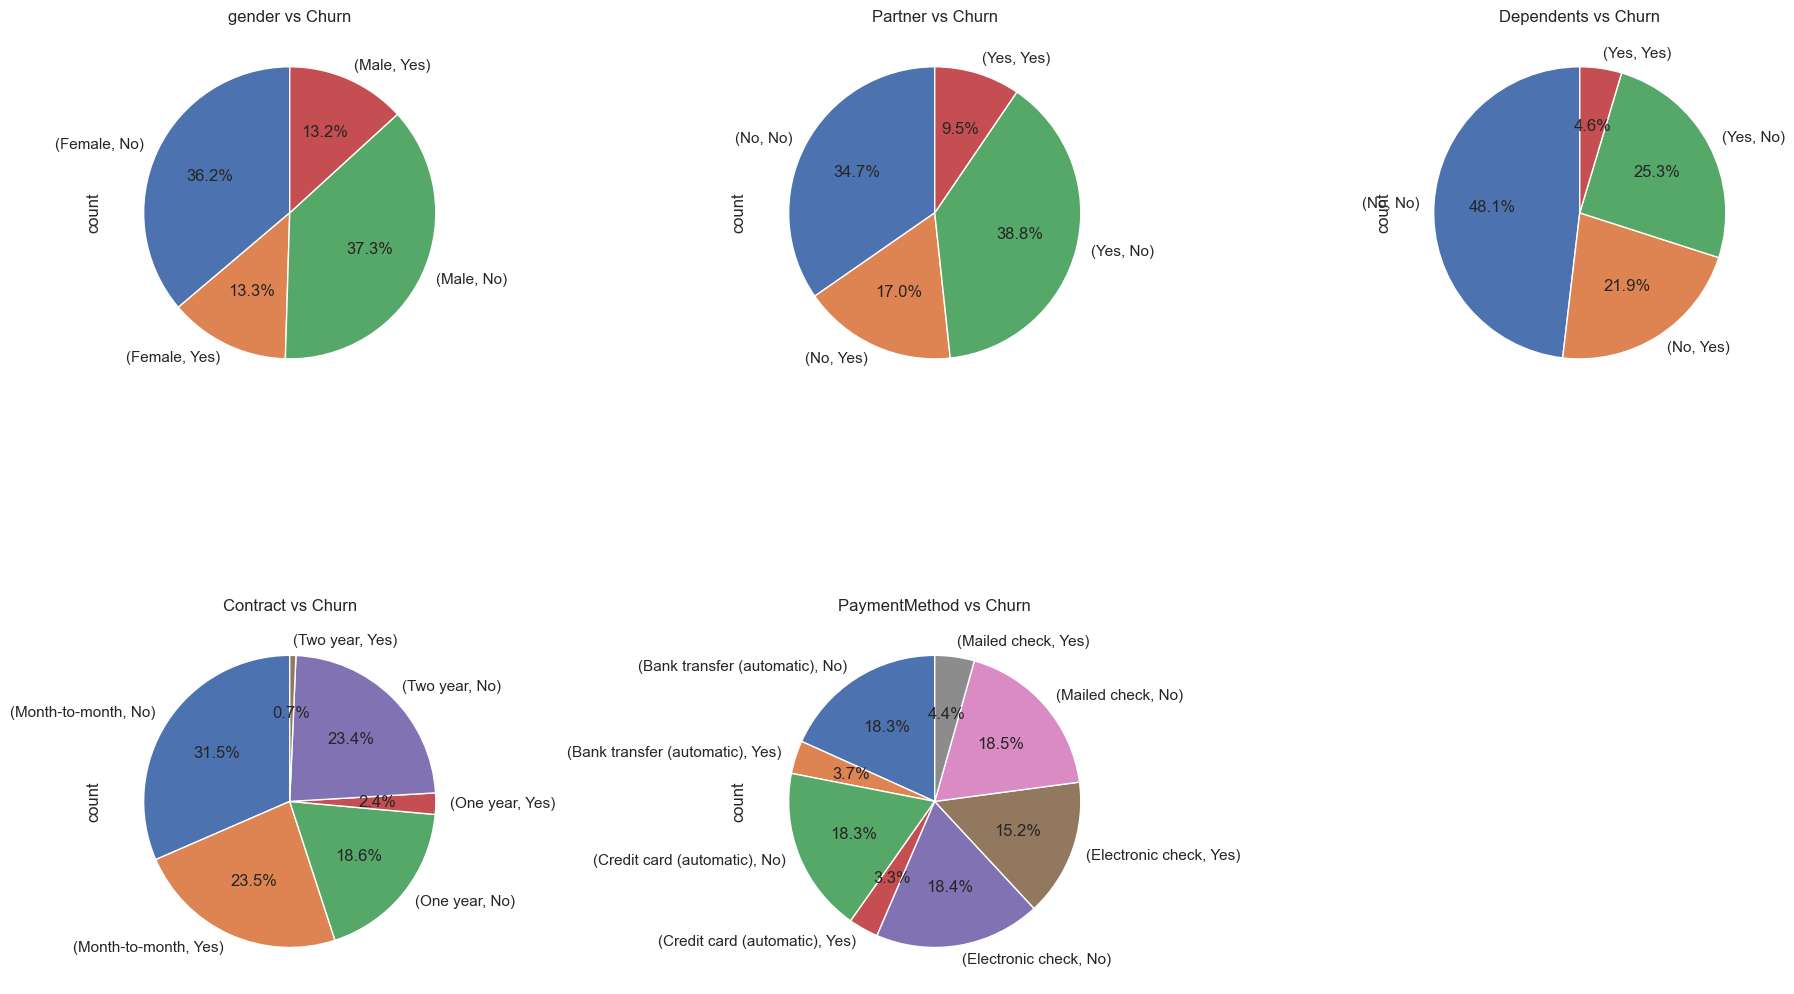

In [27]:
### Multivariate analysis using pieplot

import matplotlib.pyplot as plt

# Categorical features to analyze with respect to Churn
categorical_features = [
    'gender',
    'Partner',
    'Dependents',
    'Contract',
    'PaymentMethod'
]

# Create pie plots
plt.figure(figsize=(18, 12))

for i, feature in enumerate(categorical_features, 1):
    data = df.groupby(feature)['Churn'].value_counts()
    
    plt.subplot(2, 3, i)
    data.plot(
        kind='pie',
        autopct='%1.1f%%',
        legend=False,
        startangle=90
    )
    plt.title(f'{feature} vs Churn')

plt.tight_layout()
plt.show()


### Insights
- Gender: Churn is almost the same for male and female customers.
- Partner: Customers without a partner churn more than those with a partner.
- Dependents: Customers without dependents have a higher churn rate.
- Contract: Month-to-month contracts show the highest churn, while long-term contracts churn less.
- Payment Method: Customers using electronic check have higher churn compared to other payment methods.

## Feature Wise Visualization

### GENDER


### Univariate Analysis

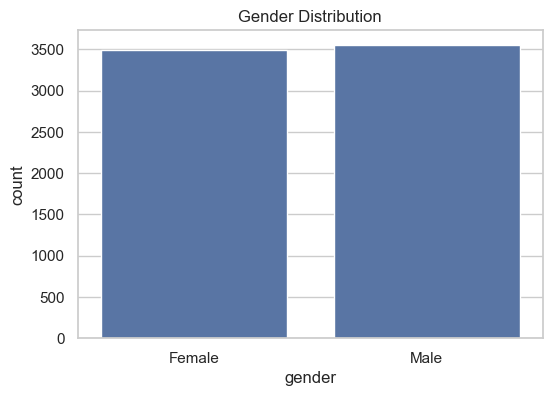

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()


### Bivariate Analysis

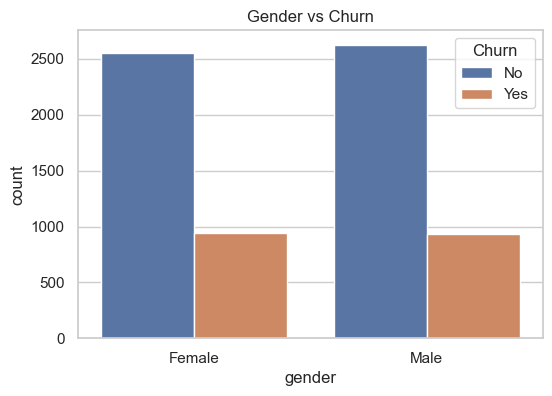

In [33]:
### Gender vs Churn

plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Gender vs Churn')
plt.show()


## Contract Type Distribution

### Univariate Distribution

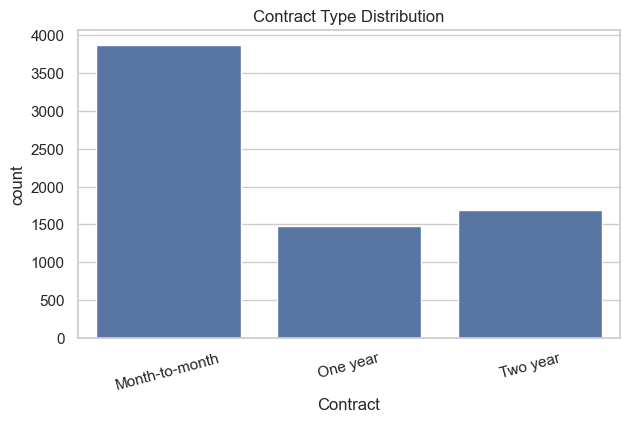

In [34]:
plt.figure(figsize=(7,4))
sns.countplot(x='Contract', data=df)
plt.title('Contract Type Distribution')
plt.xticks(rotation=15)
plt.show()


### Bivariate Distribution

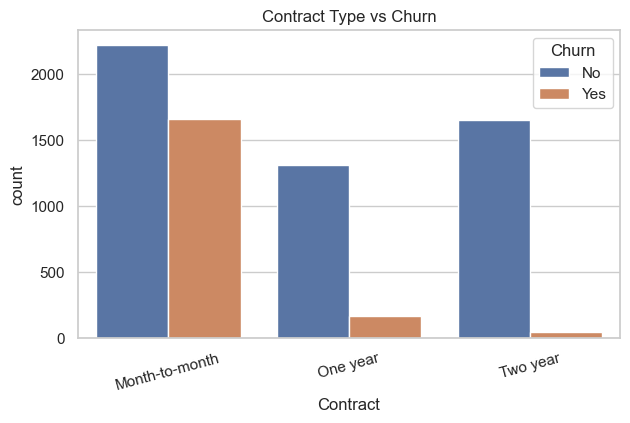

In [35]:
### contract vs churn

plt.figure(figsize=(7,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type vs Churn')
plt.xticks(rotation=15)
plt.show()


### Monthly Charges Distribution

### Univariate Analysis

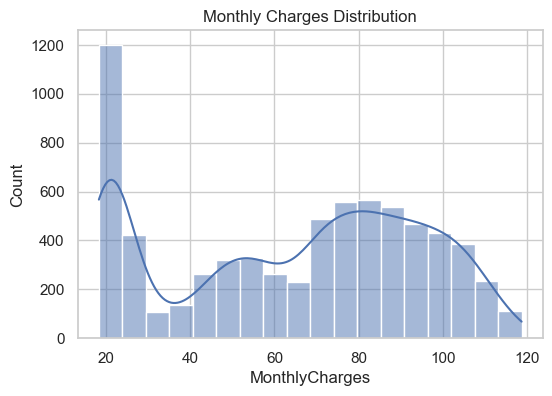

In [36]:
plt.figure(figsize=(6,4))
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Monthly Charges Distribution')
plt.show()


### Bivariate Analysis

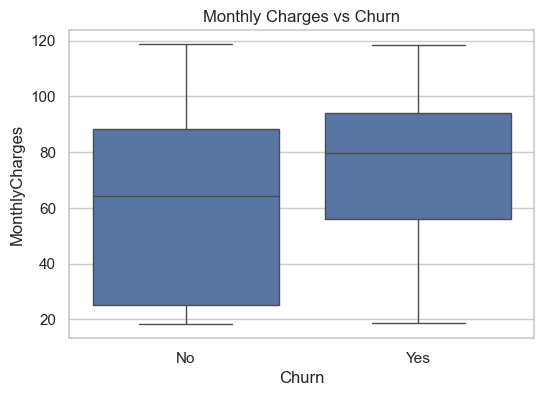

In [37]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()


### Tenure Distribution

### Univariate Distribution

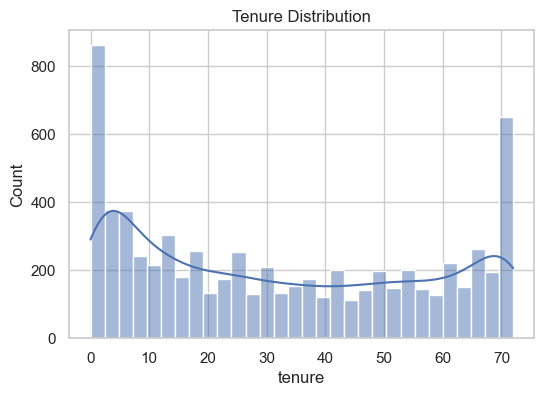

In [40]:
plt.figure(figsize=(6,4))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Tenure Distribution')
plt.show()


### Bivariste Analysis


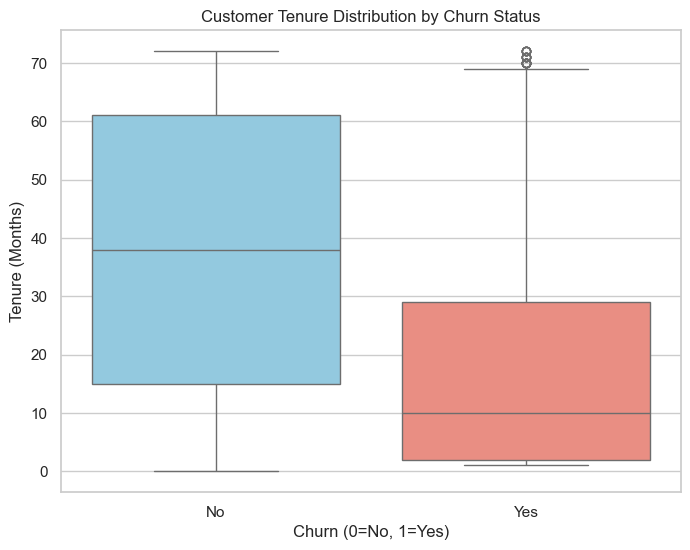

In [43]:
# Cell for Bivariate Analysis: Tenure vs. Churn

plt.figure(figsize=(8, 6))

# Use a Box Plot to show the distribution and median difference clearly
sns.boxplot(
    x='Churn', 
    y='tenure', 
    data=df, 
    palette=['skyblue', 'salmon']
)

plt.title('Customer Tenure Distribution by Churn Status')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Tenure (Months)')
plt.show()

# Insight: You should see the box for 'Yes' (Churn=1) centered around a much 
# lower tenure value (e.g., 10 months) than the box for 'No' (Churn=0).

## Conclusion
- Customers with short tenure and month-to-month contracts are most likely to churn.
- High monthly charges and lack of support/security services increase churn risk.
- Demographics have little impact; churn is mainly driven by pricing and service plans.